Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Reading CSV file displaying its head and obtaining basic information out of it

In [9]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [11]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [13]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


Creating a new column text length storing the number of words in the text column

In [16]:
yelp['text length'] = yelp['text'].apply(len)

Facet Grid based on text length and star ratings

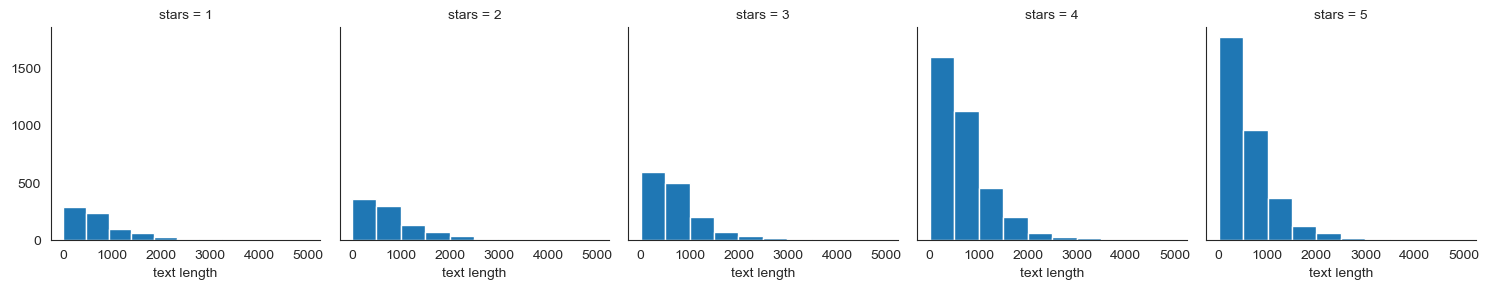

In [19]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

Boxplot of text length for each star category

<Axes: xlabel='stars', ylabel='text length'>

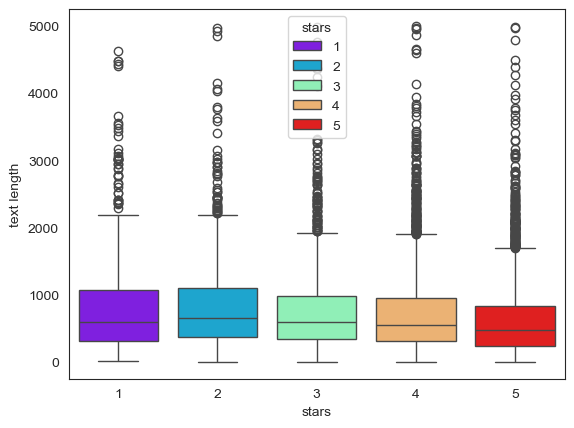

In [24]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow',hue='stars')

Countplot of the number of occurrences for each type of star rating.

<Axes: xlabel='stars', ylabel='count'>

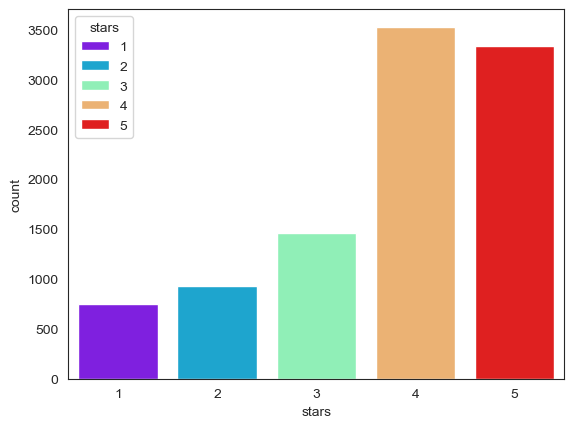

In [29]:
sns.countplot(x='stars',data=yelp,palette='rainbow',hue='stars')

Using groupby to get the mean values of the numerical columns based on no of stars and plotting a heatmap based on their correlation

In [34]:
stars = yelp[['cool', 'useful', 'funny', 'text length']].groupby(yelp['stars']).mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<Axes: >

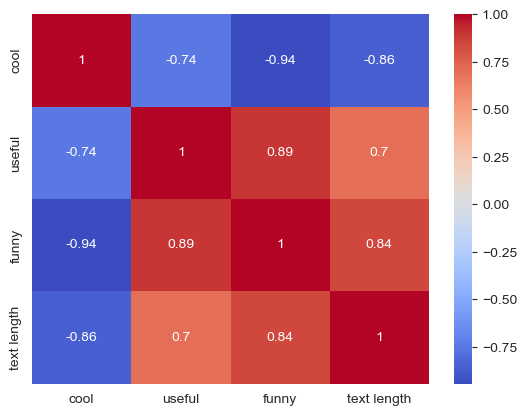

In [37]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [40]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
X = yelp_class['text']
y = yelp_class['stars']

Importing CountVectorizer and creating a CountVectorizer object.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [45]:
X = cv.fit_transform(X)

Train-Test split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

Training data using MultinomialNB

In [51]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

Predictions and Evaluations

In [54]:
predictions = nb.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

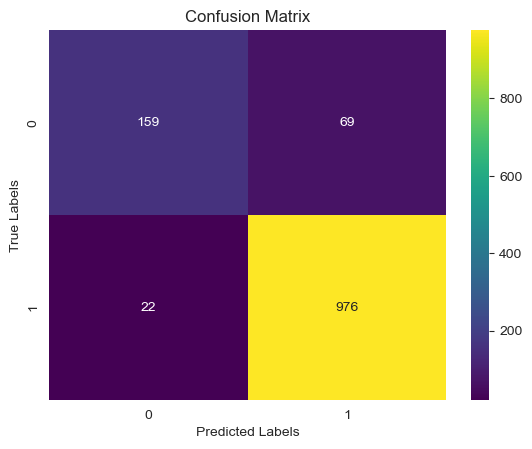

In [66]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



Using TFIDF transformer and pipeline

In [71]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [75]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

Train-test split

In [104]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

Fitting data using pipeline

In [106]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Predictions and Evaluation

In [108]:
predictions = pipeline.predict(X_test)

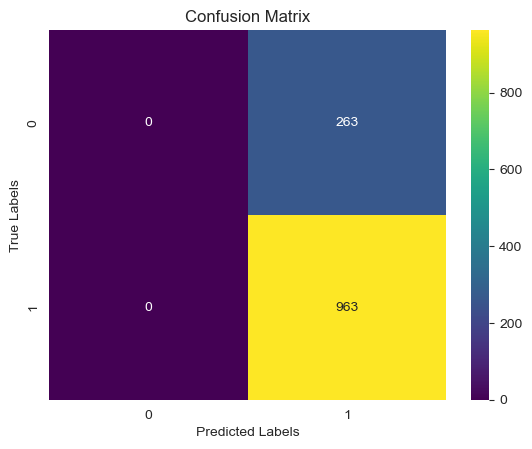

In [110]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [114]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       263
           5       0.79      1.00      0.88       963

    accuracy                           0.79      1226
   macro avg       0.39      0.50      0.44      1226
weighted avg       0.62      0.79      0.69      1226



**

This project used natural language processing to classify Yelp reviews as either 1-star or 5-star. After preprocessing and feature extraction, we trained models using both CountVectorizer (tokenizer) and TF-IDF. The model using the tokenizer showed higher accuracy, highlighting its effectiveness for this sentiment classificationtask.
